In [1]:
from sklearn.base import BaseEstimator
import numpy as np

In [2]:
class MyDummyClassifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    
    def predict(self, x):
        pred = np.zeros((x.shape[0], 1))
        for i in range(x.shape[0]):
            if x['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [3]:
from sklearn import preprocessing

def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df


def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [4]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('./train_data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = transform_features(x_titanic_df)
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

In [6]:
myclf = MyDummyClassifier()
myclf.fit(x_train, y_train)

mypredictions = myclf.predict(x_test)
print(f'Dummy Classifier의 정확도는: {accuracy_score(y_test, mypredictions):0.4f}')

Dummy Classifier의 정확도는: 0.7877


In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, x, y):
        pass
    
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

In [8]:
digits = load_digits()

y = (digits.target == 7).astype(int)
x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [9]:
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


In [10]:
fakeclf = MyFakeClassifier()
fakeclf.fit(x_train, y_train)
fakepred = fakeclf.predict(x_test)
print(f'모든 예측을 0으로 하여도 정확도는: {accuracy_score(y_test, fakepred):0.4f}')

모든 예측을 0으로 하여도 정확도는: 0.9000


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [12]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도 {accuracy:0.4f}, 정밀도: {precision:0.4f}, 재현율: {recall:0.4f}')

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./train_data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = transform_features(x_titanic_df)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [14]:
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [15]:
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print(f'pred_proba()결과 Shape: {pred_proba.shape}')
print('pred_proba array에서 앞 3개만 샘플로 추출:')
print(pred_proba[:3])

pred_proba()결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출:
[[0.44935225 0.55064775]
 [0.86335511 0.13664489]
 [0.86429643 0.13570357]]


In [16]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측')
print(pred_proba_result[:3])

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
[[0.44935225 0.55064775 1.        ]
 [0.86335511 0.13664489 0.        ]
 [0.86429643 0.13570357 0.        ]]


In [17]:
from sklearn.preprocessing import Binarizer

x = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [18]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [19]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [20]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [21]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임계값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임계값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임계값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임계값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 0.8771, 정밀도: 0.8980, 재현율: 0.7213


In [22]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임겟값: ', np.round(thresholds[thr_index], 2))

print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임겟값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

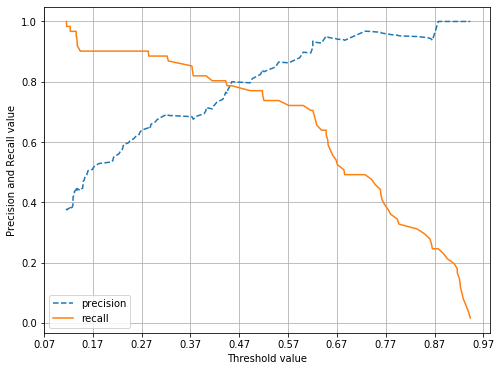

In [24]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:, 1])

In [25]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f'F1 스코어: {f1:0.4f}')

F1 스코어: 0.7966


In [26]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도 {accuracy:0.4f}, 정밀도: {precision:0.4f}, 재현율: {recall:0.4f}, F1: {f1:0.4f}')

In [27]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.7576
임계값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1: 0.7869
임계값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966
임계값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1: 0.7965
임계값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1: 0.8000


In [28]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46]
샘플용 10개의 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


In [29]:
def roc_curv_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

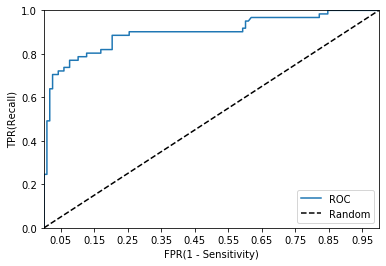

In [30]:
roc_curv_plot(y_test, pred_proba[:, 1])

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_test, pred))
print("정확도:", np.round(accuracy_score(y_test, pred), 4))
print("정밀도:", np.round(precision_score(y_test, pred), 4))
print("재현율:", np.round(recall_score(y_test, pred), 4))

[[108  10]
 [ 14  47]]
정확도: 0.8659
정밀도: 0.8246
재현율: 0.7705


In [35]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print(f'정확도 {accuracy:0.4f}, 정밀도: {precision:0.4f}, 재현율: {recall:0.4f}, F1: {f1:0.4f}, AUC: {roc_auc:4.4f}')